In [1]:
import pandas as pd
import numpy as np
import nltk 
import re
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.metrics
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
os.chdir("P:\Courses\Kaggle\Fake News Classifier")

In [3]:
data=pd.read_csv("news_articles.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [5]:
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [6]:
data.groupby('label').describe()

hasImage                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
Fake    1294.0  0.736476  0.440714  0.0  0.0  1.0  1.0  1.0
Real     801.0  0.842697  0.364314  0.0  1.0  1.0  1.0  1.0

<AxesSubplot:>

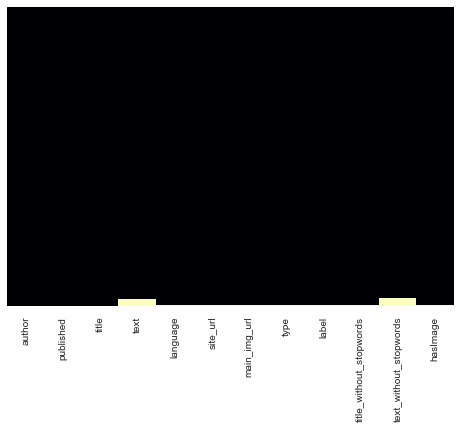

In [7]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False,cmap='magma')

In [8]:
data=data.dropna()

# Topic modelling using gensim 

In [9]:
#!pip install stop_words
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [10]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    

# compile sample documents into a list
doc_set = data['text']

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=20)

In [11]:
print(ldamodel.print_topics())

[(0, '0.038*"trump" + 0.020*"kippa" + 0.017*"jew" + 0.016*"hillari" + 0.012*"israel" + 0.011*"compani" + 0.010*"jewish" + 0.010*"poll" + 0.010*"percent" + 0.009*"sell"'), (1, '0.025*"film" + 0.013*"entertain" + 0.010*"email" + 0.008*"award" + 0.008*"industri" + 0.007*"paul" + 0.007*"includ" + 0.007*"scott" + 0.006*"star" + 0.006*"dan"'), (2, '0.023*"basebal" + 0.019*"hero" + 0.017*"father" + 0.015*"joe" + 0.013*"movi" + 0.011*"son" + 0.009*"alon" + 0.008*"team" + 0.008*"david" + 0.008*"said"'), (3, '0.042*"clinton" + 0.022*"email" + 0.018*"campaign" + 0.017*"hillari" + 0.015*"podesta" + 0.009*"obama" + 0.009*"speech" + 0.007*"trump" + 0.006*"cathol" + 0.005*"wikileak"'), (4, '0.008*"will" + 0.006*"one" + 0.006*"peopl" + 0.005*"can" + 0.005*"us" + 0.005*"like" + 0.004*"state" + 0.004*"just" + 0.004*"time" + 0.004*"get"'), (5, '0.010*"said" + 0.008*"syria" + 0.007*"forc" + 0.006*"saudi" + 0.006*"muslim" + 0.006*"isi" + 0.006*"militari" + 0.006*"terrorist" + 0.005*"islam" + 0.005*"citi"')

# pyLDAvis
pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [12]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)